## IMPORTING IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

In [2]:
#api_df = pd.read_csv("API_Functions.csv")
dll_df = pd.read_csv("DLLs_Imported.csv")
header_df = pd.read_csv("PE_Header.csv")
section_df = pd.read_csv("PE_Section.csv")
print ("success")

success


In [3]:
data = pd.read_csv("DLLs_Imported.csv")
data.head()

,SHA256,Type,advapi32.dll,kernel32.dll,vspmsg.dll,ole32.dll,oleaut32.dll,psapi.dll,setupapi.dll,shlwapi.dll,...,odbccp32.dll,api-ms-win-crt-environment-l1-1-0.dll,api-ms-win-core-memory-l1-1-3.dll,api-ms-win-core-datetime-l1-1-0.dll,api-ms-win-core-psapi-ansi-l1-1-0.dll,api-ms-win-core-fibers-l1-1-0.dll,api-ms-win-core-file-l2-1-0.dll,api-ms-win-core-sysinfo-l1-2-0.dll,dbgeng.dll,d3d11.dll
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2a053f32b1d48539e3e2807f86754be87ce95b08378467...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,308e8bb2e8a3b67607d2454370e0b50147b42049bda813...,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
header_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29807 entries, 0 to 29806
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SHA256                       29807 non-null  object
 1   Type                         29807 non-null  int64 
 2   e_magic                      29807 non-null  int64 
 3   e_cblp                       29807 non-null  int64 
 4   e_cp                         29807 non-null  int64 
 5   e_crlc                       29807 non-null  int64 
 6   e_cparhdr                    29807 non-null  int64 
 7   e_minalloc                   29807 non-null  int64 
 8   e_maxalloc                   29807 non-null  int64 
 9   e_ss                         29807 non-null  int64 
 10  e_sp                         29807 non-null  int64 
 11  e_csum                       29807 non-null  int64 
 12  e_ip                         29807 non-null  int64 
 13  e_cs                         29

In [5]:
data.describe()

,Type,advapi32.dll,kernel32.dll,vspmsg.dll,ole32.dll,oleaut32.dll,psapi.dll,setupapi.dll,shlwapi.dll,pdh.dll,...,odbccp32.dll,api-ms-win-crt-environment-l1-1-0.dll,api-ms-win-core-memory-l1-1-3.dll,api-ms-win-core-datetime-l1-1-0.dll,api-ms-win-core-psapi-ansi-l1-1-0.dll,api-ms-win-core-fibers-l1-1-0.dll,api-ms-win-core-file-l2-1-0.dll,api-ms-win-core-sysinfo-l1-2-0.dll,dbgeng.dll,d3d11.dll
count,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,...,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000,29498.000000
mean,3.145874,0.224591,0.494881,0.000068,0.105092,0.105838,0.009662,0.002034,0.045495,0.001187,...,0.000271,0.000034,0.000407,0.000237,0.000068,0.000102,0.000102,0.000102,0.000034,0.000034
std,1.806477,0.417320,0.499982,0.008234,0.306677,0.307635,0.097819,0.045055,0.208390,0.034426,...,0.016466,0.005822,0.020166,0.015403,0.008234,0.010084,0.010084,0.010084,0.005822,0.005822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.dtypes

SHA256                                object
Type                                   int64
advapi32.dll                           int64
kernel32.dll                           int64
vspmsg.dll                             int64
                                       ...  
api-ms-win-core-fibers-l1-1-0.dll      int64
api-ms-win-core-file-l2-1-0.dll        int64
api-ms-win-core-sysinfo-l1-2-0.dll     int64
dbgeng.dll                             int64
d3d11.dll                              int64
Length: 631, dtype: object

In [7]:
category_counts = data.groupby('Type').size().reset_index(name='Count')

print(category_counts)

   Type  Count
0     0   1877
1     1   5022
2     2   4643
3     3   4957
4     4   5076
5     5   4224
6     6   3699


### Malware Type / family Labels:

0=Benign
1=RedLineStealer
2= Downloader
3=RAT
4=BankingTrojan
5=SnakeKeyLogger
6=Spyware

In [8]:
df_filtered = data[~data['Type'].isin([7,8])]

In [9]:
category_counts = df_filtered.groupby('Type').size().reset_index(name='Count')

print(category_counts)

   Type  Count
0     0   1877
1     1   5022
2     2   4643
3     3   4957
4     4   5076
5     5   4224
6     6   3699


## TRAIN, TEST DATA

In [10]:
X = df_filtered.drop(columns=["SHA256","Type"])
X = X.astype('int8')
y = df_filtered["Type"]
y = y.astype('int8')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

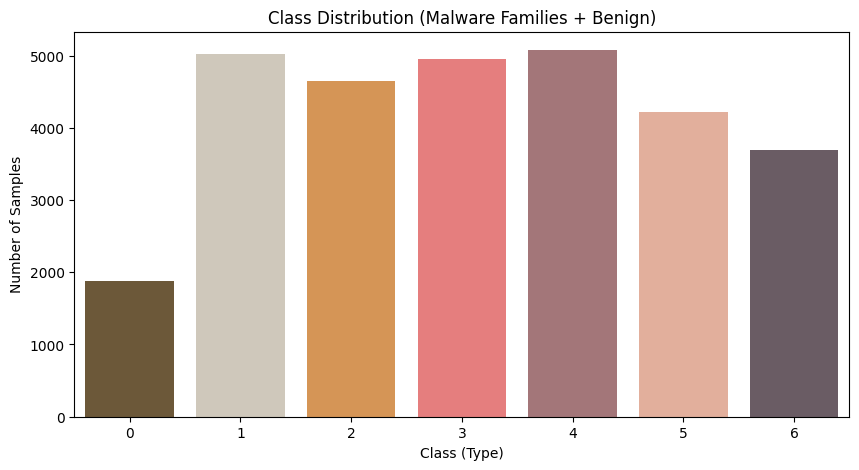

In [12]:
plt.figure(figsize=(10,5))
palette = ['#755a30', '#d2c9b8', '#ea9541', '#f66d6d', '#aa6f73', '#eea990', '#6d5964']
sns.countplot(data=df_filtered, x='Type', hue='Type', palette=palette, legend = False)
plt.title("Class Distribution (Malware Families + Benign)")
plt.xlabel("Class (Type)")
plt.ylabel("Number of Samples")
plt.show()

## DECISION TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm_dt = confusion_matrix(y_test, y_pred)

Accuracy: 0.6263

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.36      0.53       342
           1       0.83      0.74      0.78       988
           2       0.96      0.91      0.93       983
           3       0.89      0.40      0.55      1049
           4       0.68      0.74      0.71       974
           5       0.98      0.13      0.22       835
           6       0.30      0.98      0.46       729

    accuracy                           0.63      5900
   macro avg       0.80      0.61      0.60      5900
weighted avg       0.80      0.63      0.62      5900



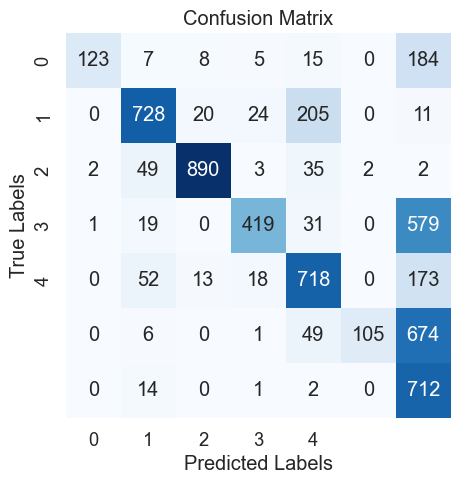

In [15]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2) 
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, 
            xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import sketch
import dataprep
from dataprep.eda import create_report, plot, plot_missing, plot_correlation

ModuleNotFoundError: No module named 'dataprep'